In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
import pickle

# Load the datasets
with open('train_test_data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)


In [36]:
X_train

array([[-0.28187388, -0.08111071,  1.00142704,  0.36944587,  1.54919334,
        -0.77055175,  1.51338117],
       [ 0.59826294, -0.08111071, -0.92584764,  0.36944587, -0.64549722,
         1.29777137, -0.66077206],
       [ 0.20709102, -0.08111071, -0.92584764,  3.06112292, -0.64549722,
         1.29777137, -0.66077206],
       [-1.06421772, -1.45999279, -0.92584764, -0.52777981, -0.64549722,
        -0.77055175, -0.66077206],
       [-0.47745984, -0.08111071, -0.92584764,  1.26667155, -0.64549722,
         1.29777137, -0.66077206],
       [-0.08628792, -1.45999279, -0.92584764,  0.36944587, -0.64549722,
        -0.77055175, -0.66077206],
       [ 0.06040155, -0.08111071,  1.00142704, -1.4250055 , -0.64549722,
        -0.77055175,  1.51338117],
       [ 0.98943485,  1.29777137,  1.00142704, -0.52777981,  1.54919334,
        -0.77055175, -0.66077206],
       [ 0.15819453,  1.29777137,  1.00142704,  0.36944587, -0.64549722,
        -0.77055175, -0.66077206],
       [-1.30870017, -1.4599

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.coef_

array([12109.195723  ,  2671.6154691 ,  3628.10741329, -9537.19763432,
        7606.656378  ,   686.17973692, 10122.66928178])

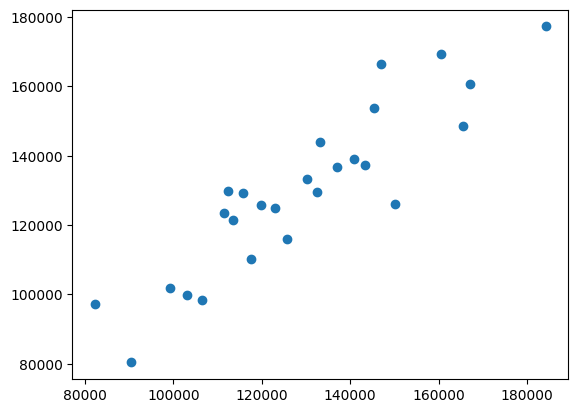

In [41]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)

In [42]:
residuals = y_test-y_pred
residuals

55      9670.196352
40      8180.989311
19      6643.816566
31    -17583.085553
98     -8215.945884
56      1914.805512
69     17137.694848
104   -14855.198196
81      7033.836214
26       266.831757
94     -8701.242284
27     -2535.195042
64     -3016.983890
4      -5930.714101
96    -10785.726255
113   -13454.589743
36      7271.657246
80      5979.464602
125    -7978.188913
84     10144.173899
18    -12002.627984
10      2988.360173
118    24005.896089
11     -1911.261142
105   -19649.658965
45      3408.754798
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

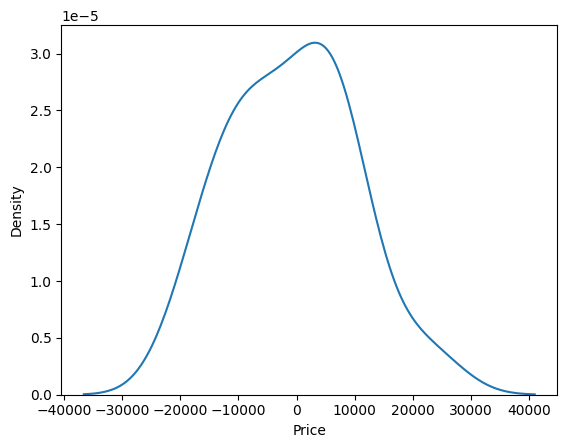

In [43]:
sns.kdeplot(residuals)

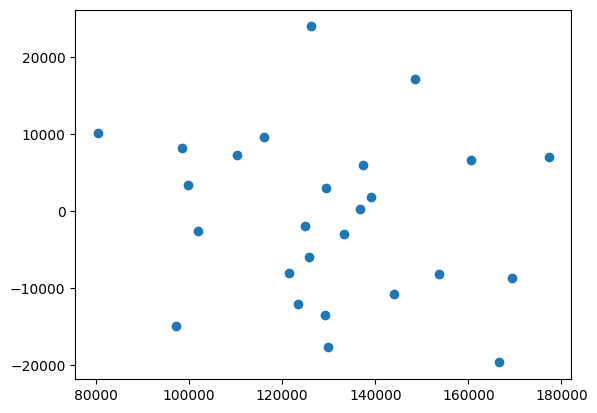

In [44]:
plt.scatter(y_pred, residuals)
# uniform distribution : model is performing well

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: " ,np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  8894.880589181874
MSE:  113786744.26879747
RMSE:  10667.086962652806


In [46]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8069444206690196


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model </br>
n: The number of observations </br>
k: The number of predictor variables

In [47]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7318672509291939

In [48]:
pickle.dump(model,open('regmodel.pkl','wb'))

# Predict on New Data

In [49]:
import pickle
import pandas as pd
import numpy as np

# Load the saved ordinal encoder, scaler, and model
ohe = pickle.load(open('onehot_encoder.pkl', 'rb'))
scaler = pickle.load(open('scaling.pkl', 'rb'))
model = pickle.load(open('regmodel.pkl', 'rb'))


In [50]:
# Step 1: Create a DataFrame for the new data point
new_data = pd.DataFrame([[2130, 3, 3, 3, 'No', 'East']], 
                        columns=['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood'])

# Step 2: Apply One-Hot Encoding (ensure format matches training)
new_data_encoded = ohe.transform(new_data[['Brick', 'Neighborhood']])

# Convert encoded array to DataFrame with correct column names
new_data_encoded_df = pd.DataFrame(new_data_encoded, 
                                   columns=ohe.get_feature_names_out(['Brick', 'Neighborhood']), 
                                   index=new_data.index)

# Drop categorical columns and concatenate encoded features
new_data = new_data.drop(columns=['Brick', 'Neighborhood'])
new_data = pd.concat([new_data, new_data_encoded_df], axis=1)

# Step 3: Apply Scaling
new_data_scaled = scaler.transform(new_data)

# Step 4: Predict House Price
predicted_price = model.predict(new_data_scaled)
print("Predicted Price:", predicted_price[0])


Predicted Price: 125730.71410128672


# Using ML PipeLine

In [3]:
# Load the saved pipeline
with open("house_price_pipeline.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

# Define new data point (as DataFrame)
new_data = pd.DataFrame([[2130, 3, 3, 3, "No", "East"]],
                        columns=["SqFt", "Bedrooms", "Bathrooms", "Offers", "Brick", "Neighborhood"])

# Predict Price
predicted_price = loaded_pipeline.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 125708.4903288367


In [3]:
import numpy as np
a = np.array([1,2,3,4,5])
a.reshape(1,-1)

array([[1, 2, 3, 4, 5]])